# Model IUH_NASH

## steps

| Num | execute | description |
| :--- | :--- | :--- |
|1 | set data in calibration_settings.ini | the ini file contains configuration parameters|
|2 | run Graph_observed_data.py | viewing of observed data |
|3 | run Split_train_test.py | split of observed data in training period and test period |
|4 | run Model_calibration.py | calibration of model parameters using a genetic algorithm |
|5 | show image graph of calibration result | hydrograph graph with calibration results |
|6 | run query_RIVERBASIN_table.py | view the table with the final parameters |
|7 | run Model_IUH_NASH_LinearRes_calc_period.py | calculating discharge values for the entire input data period |
|8 | run Flow-duration_curve.py | calculatinh of duration curves for different periods |

## let's show file calibration_settings.ini

In [1]:
! type calibration_settings.ini

[globalOptions]
# Project Path
ProjectPath = ../Project
DirFigureInput = ../FigureInput

MainDirImageout = ..

[Input_par]
# Project name
ProjectName = Tronto

# Lag time in months for runoff
SupFlowMaxLagTime =6
# Lag time in months for groundwater discharge
BaseFlowMaxLagTime =12

# duration of the year: 12 in case of monthly data
period = 12

# save file graph non disk =1, file show graph on video =0
save_fig_input = 0

# verbose yes=1, not =0
verbose = 1

[genetic]
# choice of the type of objective function
typefitness = NashSutcliffe
#typefitness = RMSE
#typefitness = MAE

# population size in the genetic algorithm
p_count = 100
# maximum number of generations
MaxGeneration = 20

# update_minmax_type= 1 calc minmax from previus attempt
# update_minmax_type=0 : use minmax in file ini
update_minmax_type = 1
# minmax default
phi_min_max = 0.0, 8.0
k_min_max = 1.0, 3.0
n_min_max = 1.0, 3.0
phi_sup_min_max = 0.9, 1.1
k_sup_min_max = 1.0, 2.0

attempts_start = 1,2,3
attempts = 4


[out_

In [2]:
! type calibration_settings.ini | grep ProjectName

ProjectName = Tronto


## run Graph_observed_data.py

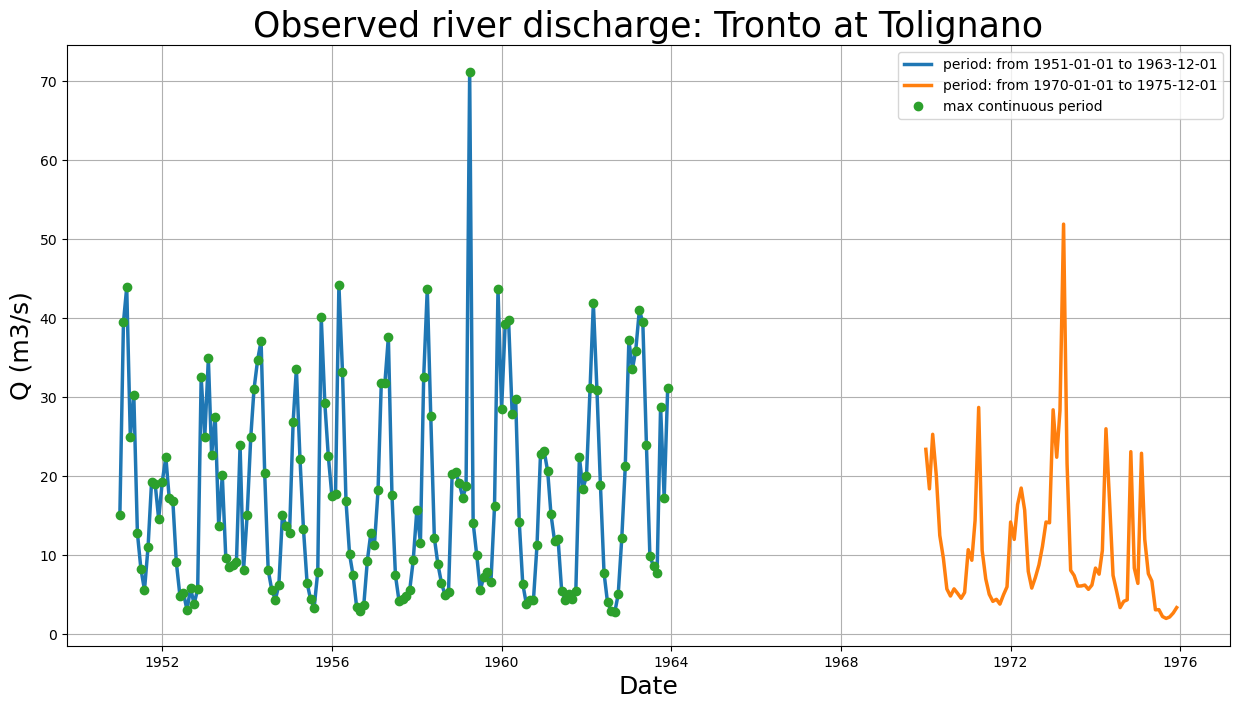

In [3]:
%run Graph_observed_data.py

# set num attemts in calibration_settings.ini

In [4]:
! cat calibration_settings.ini | grep attempts

attempts_start = 1,2,3
attempts = 4


# run Split_train_test.py

river station: Tronto at Tolignano
num months observation period = 288
num data = 216
num_nodata = 72


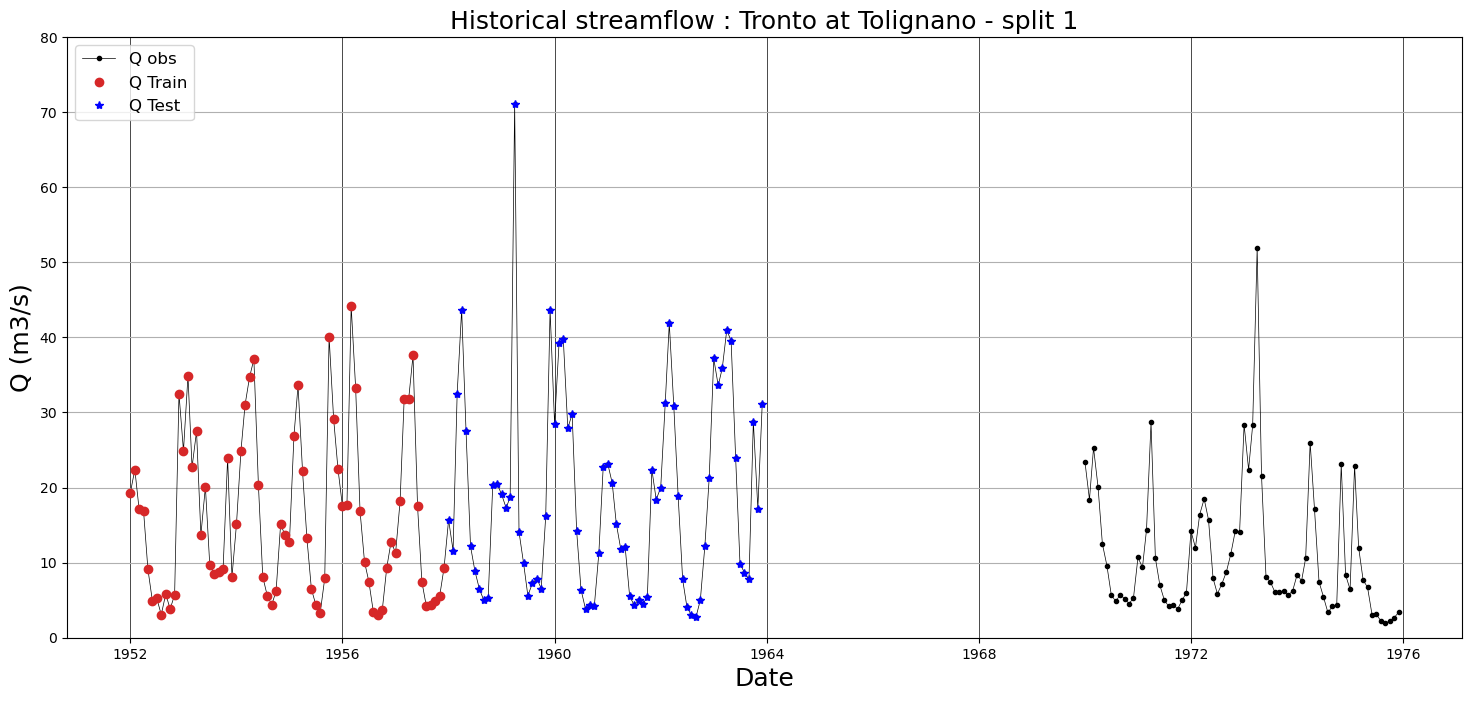

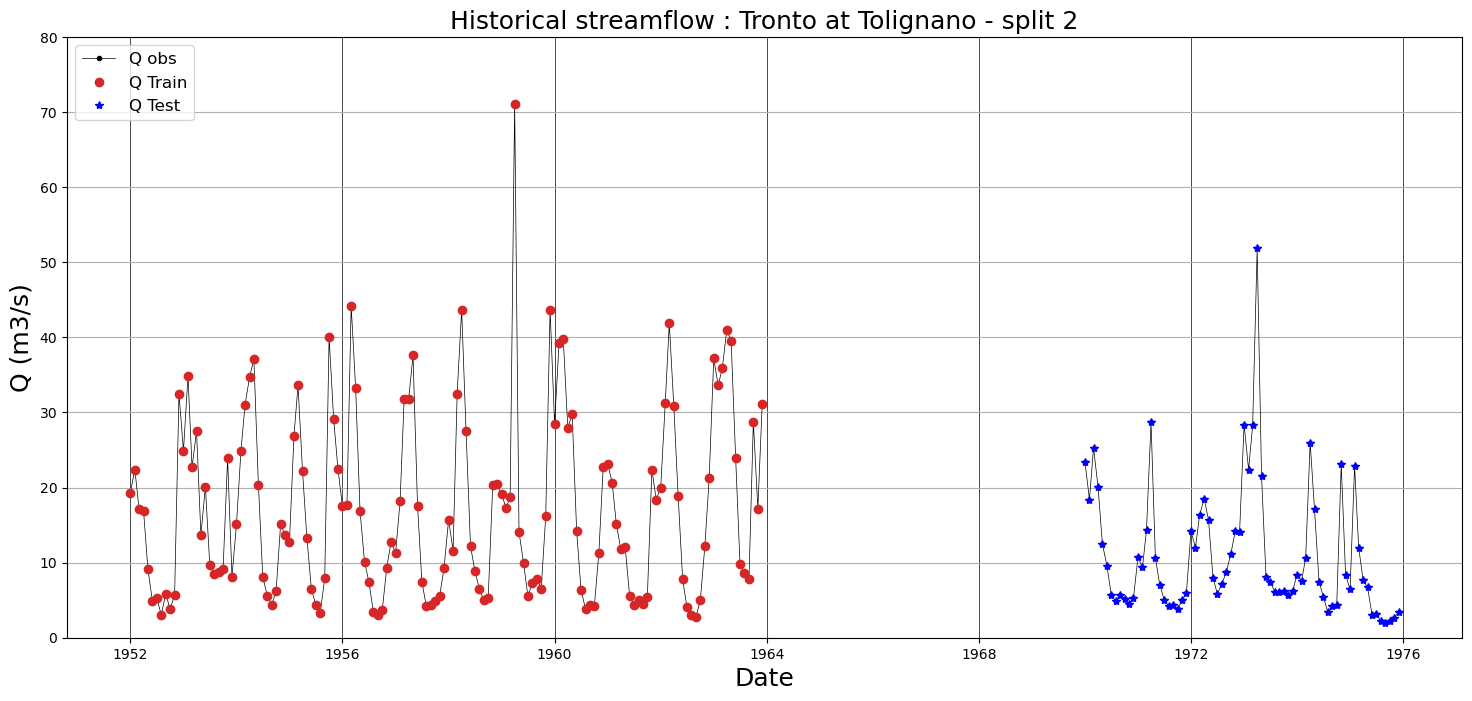

OK


In [5]:
%run Split_train_test.py

# run Model_calibration.py

In [6]:
%run Model_calibration.py

river station: Tronto at Tolignano

Starting attemt n: 1
Best chromosome ini
[132, 954, 57, 697, 227]
Best efficency ini= 0.786
................
Parameters ini
      1.06 : relationship between surface and groundwater basin area
      2.91 : depletion constant of the groundwater flow Nash model
      1.11 : number of linear reservoirs in series of the baseflow Nash model
      1.04 : increase in superficial basin area      
      1.23 : depletion constant of the linear reservoir model of surface flow
................
chromosomes fin
[206, 954, 49, 196, 48]
Best efficency fin= 0.819
Best parameters
      1.65 : relationship between surface and groundwater basin area
      2.91 : depletion constant of the groundwater flow Nash model
      1.10 : number of linear reservoirs in series of the baseflow Nash model
      0.94 : increase in superficial basin area      
      1.05 : depletion constant of the linear reservoir model of surface flow
................
Elapsed time = 2.004658460617065

## run query_Attempt_table.py

In [7]:
%run query_Attempt_table.py

   objectid  attempt     phi       k       n  phi_sup   k_sup     Eff  RMSE  \
0         1        1  1.6480  2.9080  1.0980   0.9392  1.0480  0.8193  5.26   
1         2        2  1.6320  2.5460  1.1140   0.9126  1.0040  0.8180  5.27   
2         3        3  1.1440  2.4480  1.6080   1.0990  1.0600  0.8187  5.27   
3         4        4  1.6946  2.9353  1.1130   0.9060  1.0011  0.8202  5.24   
4         5        5  1.5940  2.9169  1.2571   0.9948  1.0096  0.8526  4.22   
5         6        6  1.3807  2.9148  1.4538   1.0908  1.0455  0.8530  4.22   
6         7        7  1.4233  2.9417  1.5003   1.0586  1.0008  0.8545  4.19   

    MAE  chkvol  Eff_verif  SplitID  Best  
0  3.71  0.9859     0.7247        2     0  
1  3.71  0.9627     0.7327        2     0  
2  3.66  0.9640     0.7410        2     0  
3  3.69  0.9833     0.7297        2     0  
4  3.33  0.9856     0.7925        1     0  
5  3.33  0.9890     0.7922        1     0  
6  3.31  0.9862     0.7932        1     1  
OK


# show image graph of calibration result

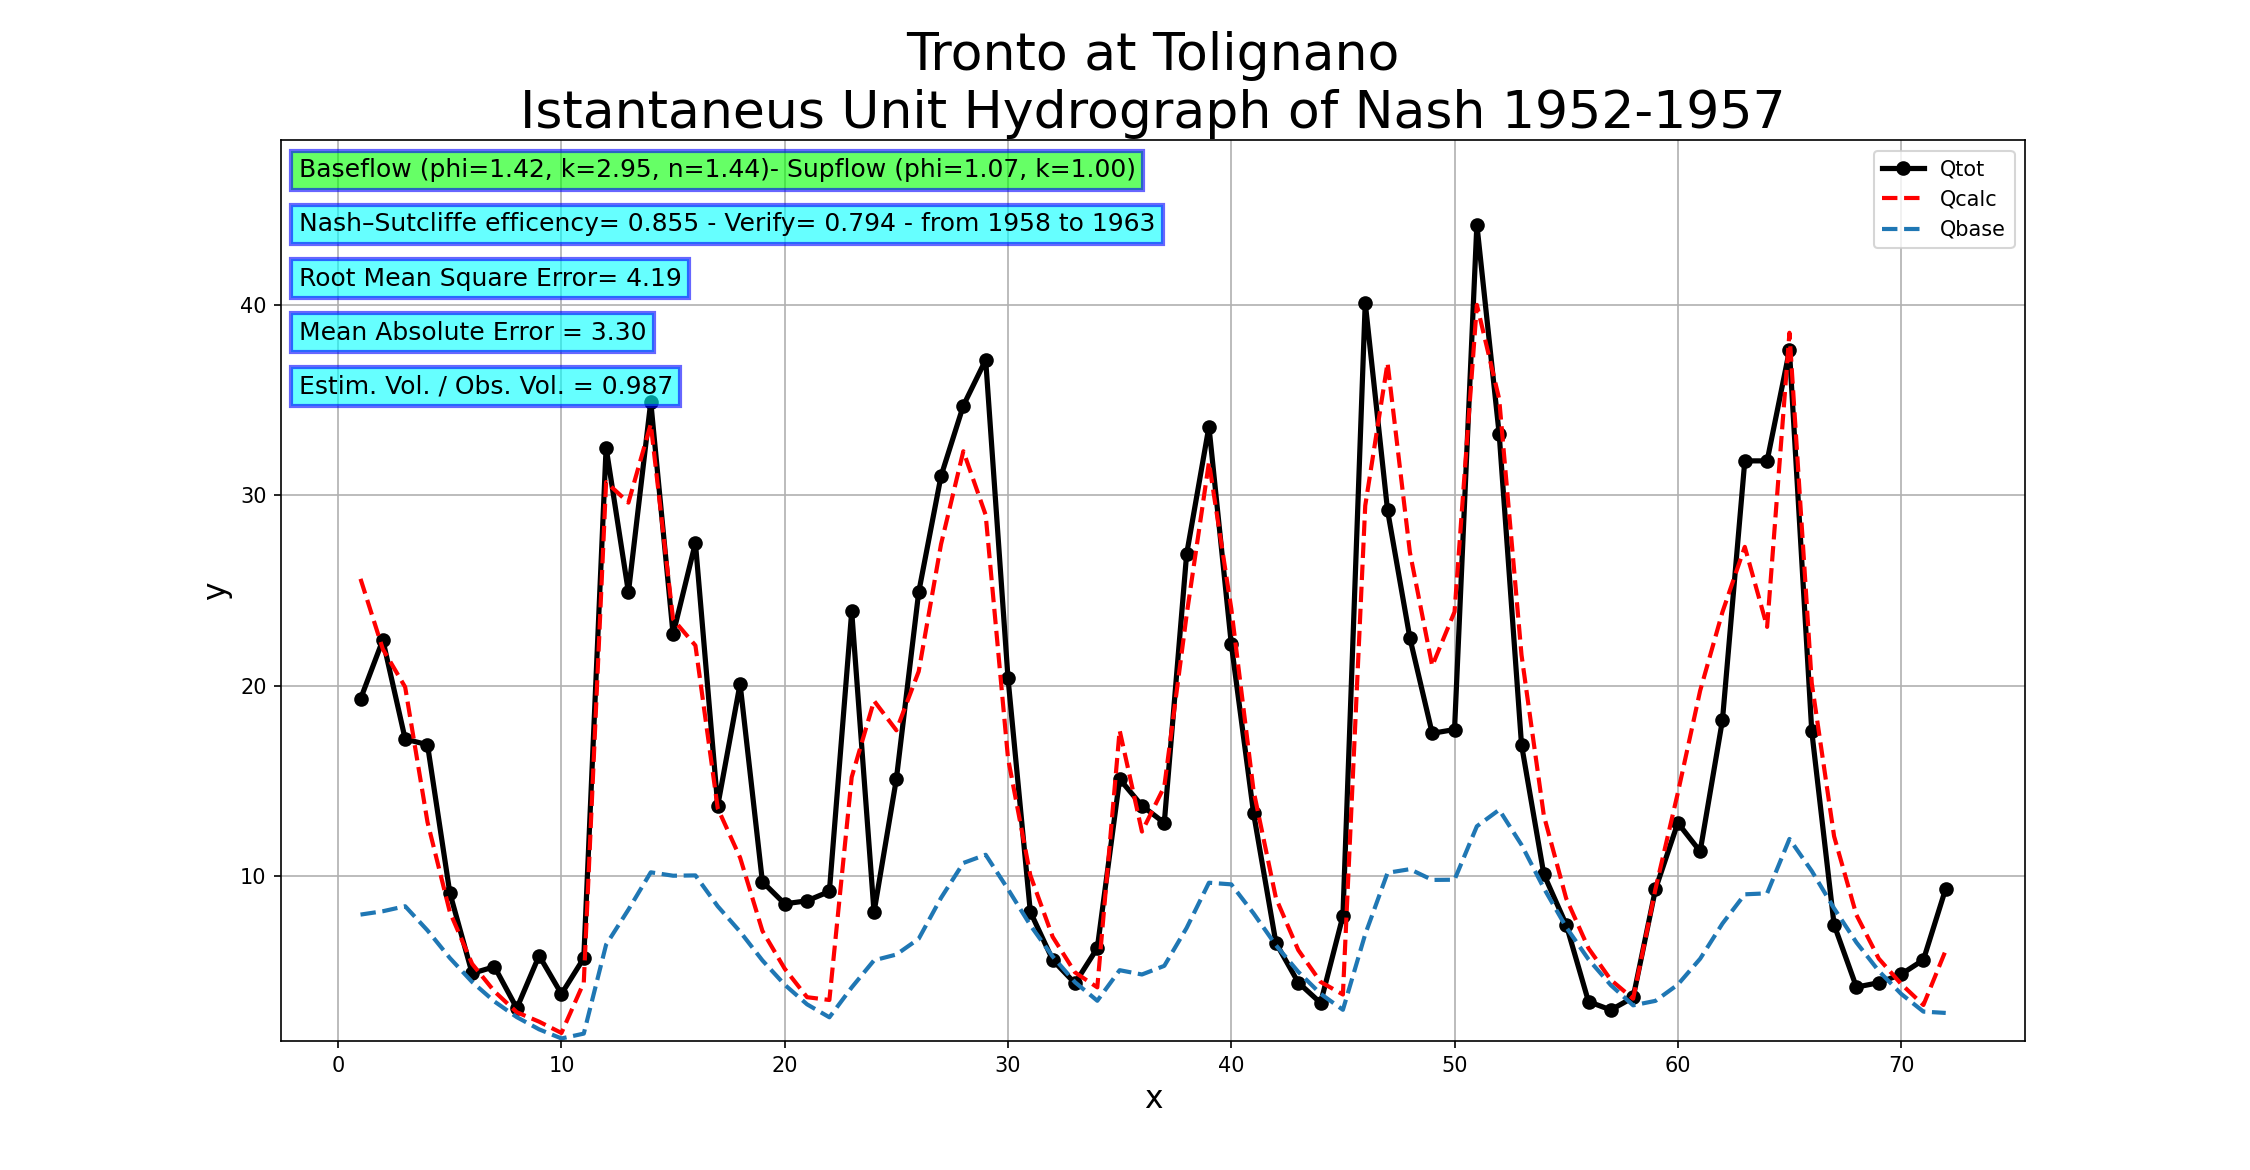

In [8]:
import configparser
import os
from IPython.display import Image
config_input='calibration_settings.ini'
config_input_location=os.path.realpath(config_input)
configuration = configparser.ConfigParser()
configuration.read(config_input_location)
MainDirImageout = configuration.get('globalOptions','MainDirImageout')
dir_out_img = configuration.get('out_img','dir_out_img')
dir_out_img = MainDirImageout + os.sep+ dir_out_img
dir_out_img = os.path.realpath(dir_out_img)
ProjectName=configuration.get('Input_par','ProjectName')
NameFig='Proj_%s_calibration.png' % (ProjectName)
FileOut=dir_out_img+os.sep+ NameFig
Image(filename=FileOut) 

## query updated RIVERBASIN table

In [9]:
%run query_RIVERBASIN_table.py

   PKUID  A_kmq     phi       k       n  phi_sup   k_sup          description
0      1  901.0  1.4175  2.9479  1.4363    1.069  1.0003  Tronto at Tolignano
OK


## run Model_IUH_NASH_LinearRes_calc_period.py

Upload QTot_calc m3/s


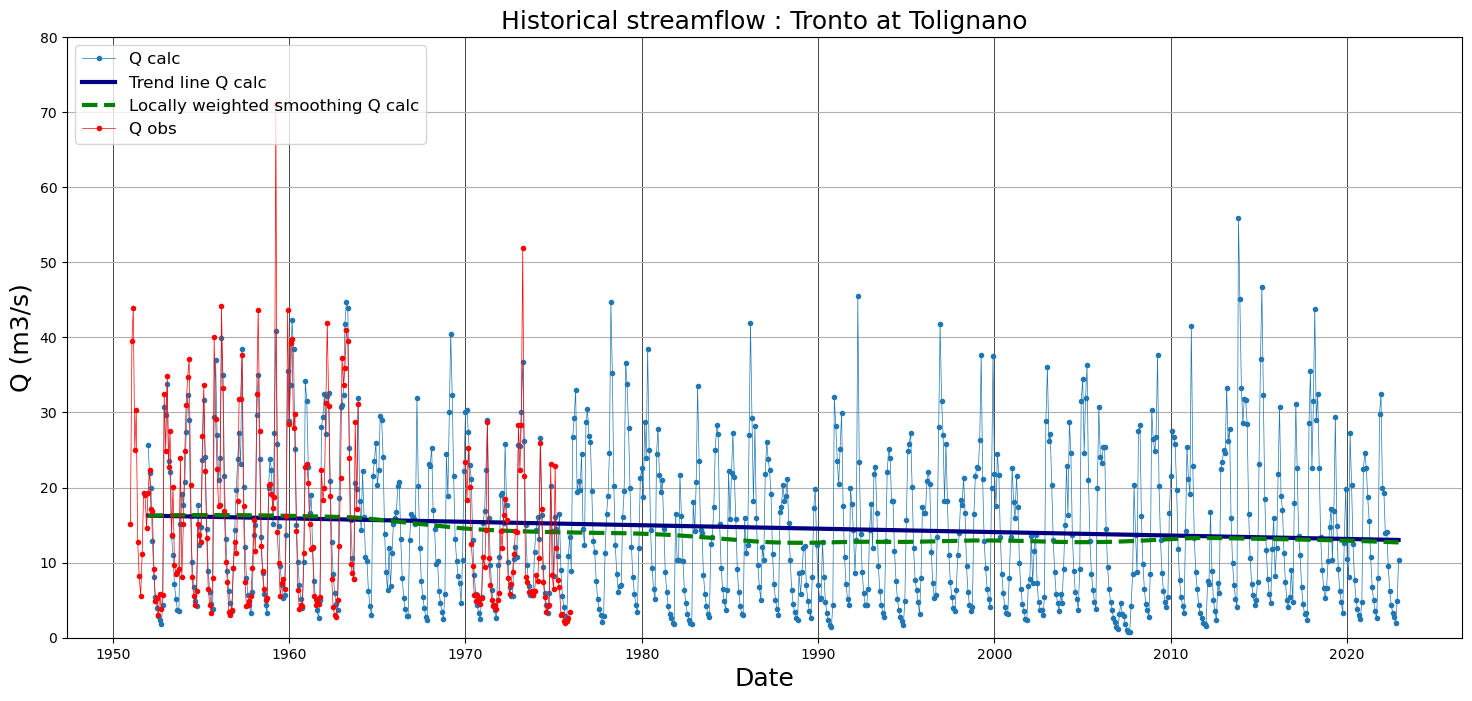

OK


In [10]:
%run Model_IUH_NASH_LinearRes_calc_period.py

## run Flow-duration_curve.py

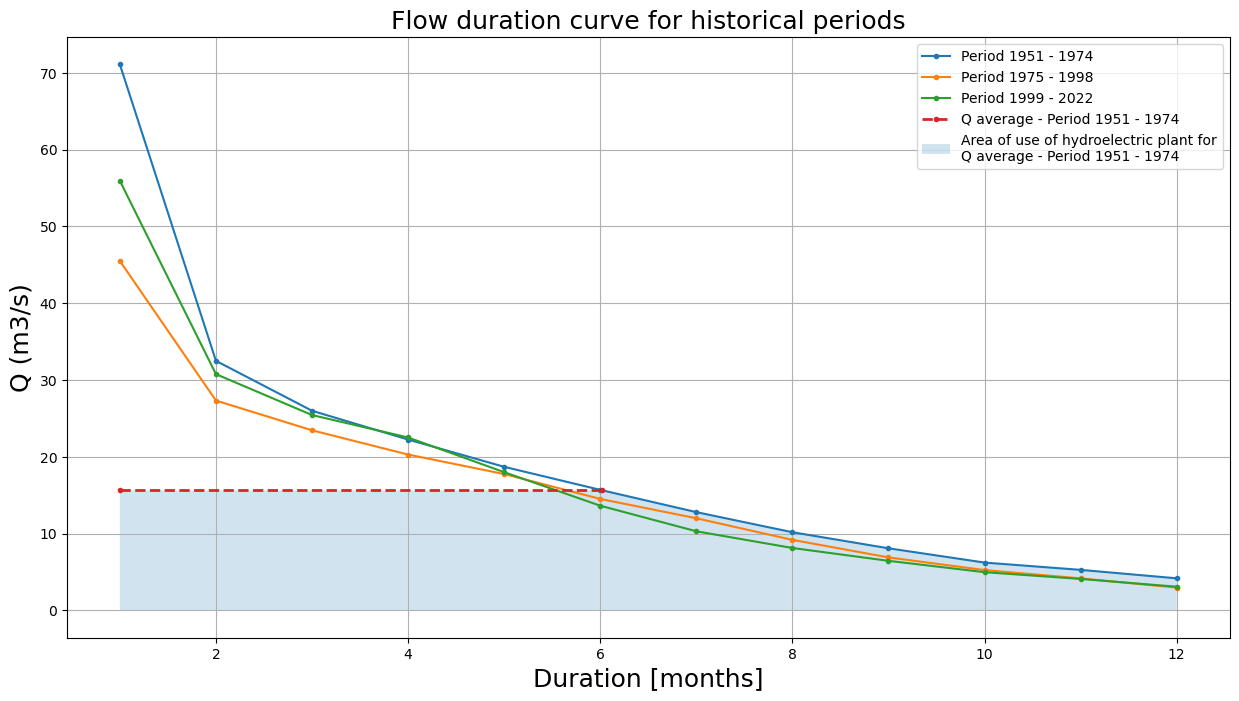

In [11]:
%run Flow-duration_curve.py